In [2]:
import ROOT,os,glob,math

Welcome to JupyROOT 6.18/00


3.141592653589793
['./bbJJMerge/bbJJMerge_km_cut0.root', './bbJJMerge/bbJJMerge_km_cut4.root']
pt(b/bbar)>0,pTHatMin=0 pt(b/bbar)>4,pTHatMin=6 ['x_mass', 'muon_1_pt', 'muon_2_pt', 'muon_3_pt', 'muon_4_pt', 'jpsi_1_pt', 'jpsi_2_pt', 'muon_1_eta', 'muon_2_eta', 'muon_3_eta', 'muon_4_eta', 'jpsi_1_eta', 'jpsi_2_eta'] 13
jpsi_2_eta


Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=200.
Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=200.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures0831/bbJJ_jpsi_2_eta.jpg has been created
Info in <TCanvas::Print>: pdf file figures0831/bbJJ_jpsi_2_eta.pdf has been created


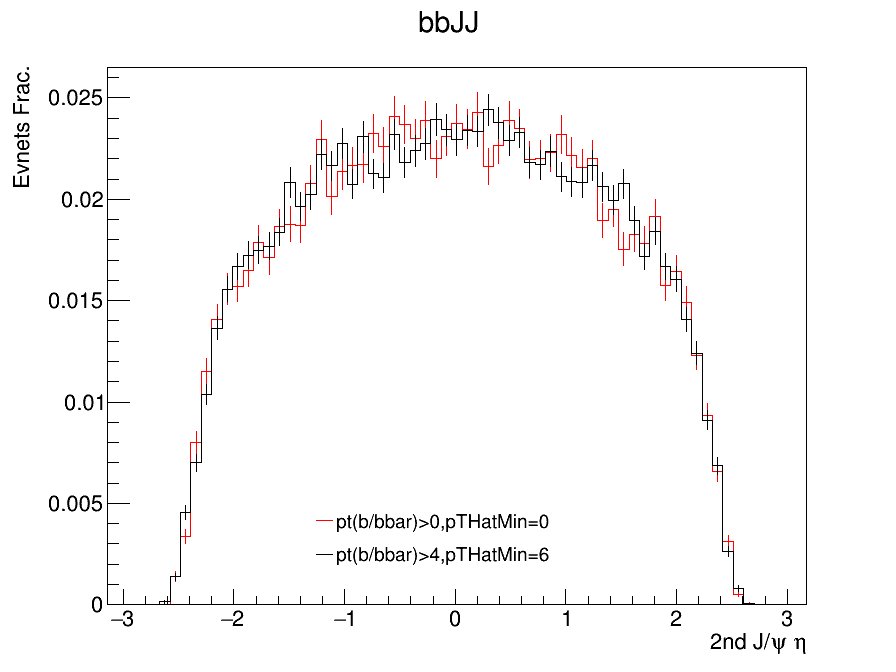

In [58]:
key="bbJJ"
#key="Bmumu"
#key="Jmumu"

pi=ROOT.TMath.Pi()
print(pi)
path="./"+key+"Merge/"
paths=glob.glob(path+key+"*km*root")
print(paths)
f1=ROOT.TFile(paths[0],"r")
f2=ROOT.TFile(paths[1],"r")
#Legend
if key=="bbJJ":
    if "cut0" in paths[0]:
        cut1="pt(b/bbar)>0,pTHatMin=0"
        cut2="pt(b/bbar)>4,pTHatMin=6"
    else:
        cut2="pt(b/bbar)>0,pTHatMin=0"
        cut1="pt(b/bbar)>4,pTHatMin=6"
if key=="Bmumu":
    if "cut0" in paths[0]:
        cut1="pt(b/bbar)>0,pTHatMin=0"
        cut2="pt(b/bbar)>5,pTHatMin=7"
    else:
        cut2="pt(b/bbar)>0,pTHatMin=0"
        cut1="pt(b/bbar)>5,pTHatMin=7"
if key=="Jmumu":
    if "cut0" in paths[0]:
        cut1="pt(b/bbar)>0,pTHatMin=0"
        cut2="pt(b/bbar)>7,pTHatMin=7"
    else:
        cut2="pt(b/bbar)>0,pTHatMin=0"
        cut1="pt(b/bbar)>7,pTHatMin=7"
anglelist=[]
for i in f1.GetListOfKeys():
    anglelist.append(i.GetName())
print(cut1,cut2,anglelist,len(anglelist))
hist=anglelist[12]
print(hist)
h1=f1.Get(hist)
h2=f2.Get(hist)
rebin=3
h1.Rebin(rebin)
h2.Rebin(rebin)
h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())
h1.GetXaxis().SetRangeUser(-pi,pi)
#h1.GetXaxis().SetRangeUser(0,60)
h1.SetNameTitle("",key)
#h1.GetXaxis().SetTitle("m_{#mu^{+}#mu^{-}#mu^{+}#mu^{-}}[GeV]")
#h1.GetXaxis().SetTitle("1st #mu p_{T}[GeV]")
#h1.GetXaxis().SetTitle("2nd #mu p_{T}[GeV]")
#h1.GetXaxis().SetTitle("3rd #mu p_{T}[GeV]")
#h1.GetXaxis().SetTitle("4st #mu p_{T}[GeV]")
#h1.GetXaxis().SetTitle("1st J/#psi p_{T}[GeV]")
#h1.GetXaxis().SetTitle("2nd J/#psi p_{T}[GeV]")
#h1.GetXaxis().SetTitle("1st #mu #eta")
#h1.GetXaxis().SetTitle("2nd #mu #eta")
#h1.GetXaxis().SetTitle("3rd #mu #eta")
#h1.GetXaxis().SetTitle("4st #mu #eta")
#h1.GetXaxis().SetTitle("1st J/#psi #eta")
h1.GetXaxis().SetTitle("2nd J/#psi #eta")
h1.GetYaxis().SetTitle("Evnets Frac.")
h1.SetLineColor(2)
h2.SetLineColor(1)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
#c1.SetLogy()
c1.SetLeftMargin(0.12)
#print(c1.GetLeftMargin())
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
#t=ROOT.TLegend(0.5,0.75,0.6,0.85)
#t=ROOT.TLegend(0.4,0.7,0.5,0.8)
#t=ROOT.TLegend(0.4,0.4,0.5,0.5)
t=ROOT.TLegend(0.35,0.15,0.45,0.25)
t.AddEntry(h1,cut1,"l")
t.AddEntry(h2,cut2,"lp")
t.SetBorderSize(0)
t.SetTextSize(0.03)
t.Draw()
c1.Draw()
name=key+"_"+hist
c1.SaveAs("figures0831/"+name+".jpg")
c1.SaveAs("figures0831/"+name+".pdf")